In [ ]:
import os 
os.environ['KAGGLE_USERNAME'] = "YUVASRI"
os.environ['KAGGLE_KEY'] = "7788f9b761a1a8f81219c7927e26a42c"

!kaggle datasets download -d gpiosenka/100-bird-species

100% 1.95G/1.96G [00:15<00:00, 189MB/s]
100% 1.96G/1.96G [00:15<00:00, 132MB/s]


In [2]:
!unzip 100-bird-species.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/WHITE TAILED TROPIC/120.jpg  
  inflating: train/WHITE TAILED TROPIC/121.jpg  
  inflating: train/WHITE TAILED TROPIC/122.jpg  
  inflating: train/WHITE TAILED TROPIC/123.jpg  
  inflating: train/WHITE TAILED TROPIC/124.jpg  
  inflating: train/WHITE TAILED TROPIC/125.jpg  
  inflating: train/WHITE TAILED TROPIC/126.jpg  
  inflating: train/WHITE TAILED TROPIC/127.jpg  
  inflating: train/WHITE TAILED TROPIC/128.jpg  
  inflating: train/WHITE TAILED TROPIC/129.jpg  
  inflating: train/WHITE TAILED TROPIC/130.jpg  
  inflating: train/WHITE TAILED TROPIC/131.jpg  
  inflating: train/WHITE TAILED TROPIC/132.jpg  
  inflating: train/WHITE TAILED TROPIC/133.jpg  
  inflating: train/WHITE TAILED TROPIC/134.jpg  
  inflating: train/WHITE TAILED TROPIC/135.jpg  
  inflating: train/WHITE TAILED TROPIC/136.jpg  
  inflating: train/WHITE TAILED TROPIC/137.jpg  
  inflating: train/WHITE TAILED TROPIC/138.jpg  
  inflating: train

In [3]:

import matplotlib.pyplot as plt
import pathlib, os, random
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization, Dropout , GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras import Sequential
import keras
from keras.callbacks import Callback, EarlyStopping,ModelCheckpoint

In [4]:
import os
import random
import shutil

# Specify the directory paths
train_folder_path = "/content/train"
test_folder_path = "/content/test"
val_folder_path = "/content/valid"

# Get a list of all folder names in the train directory
folders = [folder for folder in os.listdir(train_folder_path) if os.path.isdir(os.path.join(train_folder_path, folder))]

# Shuffle the list of folder names
random.shuffle(folders)

# Save the first 500 folder names in a text file
with open("folder_names.txt", "w") as file:
    for folder_name in folders[:500]:
        file.write(folder_name + "\n")

# Read the folder names from the text file
with open("folder_names.txt", "r") as file:
    folder_names = file.read().splitlines()

# Delete the folders from the train, test, and valid directories
for folder_name in folder_names:
    # Delete the folder from the train directory
    train_folder = os.path.join(train_folder_path, folder_name)
    if os.path.exists(train_folder):
        shutil.rmtree(train_folder)
        print(f"Deleted folder from train: {train_folder}")
    else:
        print(f"Folder not found in train: {train_folder}")

    # Delete the folder from the test directory
    test_folder = os.path.join(test_folder_path, folder_name)
    if os.path.exists(test_folder):
        shutil.rmtree(test_folder)
        print(f"Deleted folder from test: {test_folder}")
    else:
        print(f"Folder not found in test: {test_folder}")

    # Delete the folder from the valid directory
    val_folder = os.path.join(val_folder_path, folder_name)
    if os.path.exists(val_folder):
        shutil.rmtree(val_folder)
        print(f"Deleted folder from valid: {val_folder}")
    else:
        print(f"Folder not found in valid: {val_folder}")


Deleted folder from train: /content/train/CAPUCHINBIRD
Deleted folder from test: /content/test/CAPUCHINBIRD
Deleted folder from valid: /content/valid/CAPUCHINBIRD
Deleted folder from train: /content/train/IBERIAN MAGPIE
Deleted folder from test: /content/test/IBERIAN MAGPIE
Deleted folder from valid: /content/valid/IBERIAN MAGPIE
Deleted folder from train: /content/train/KILLDEAR
Deleted folder from test: /content/test/KILLDEAR
Deleted folder from valid: /content/valid/KILLDEAR
Deleted folder from train: /content/train/KNOB BILLED DUCK
Deleted folder from test: /content/test/KNOB BILLED DUCK
Deleted folder from valid: /content/valid/KNOB BILLED DUCK
Deleted folder from train: /content/train/KING EIDER
Deleted folder from test: /content/test/KING EIDER
Deleted folder from valid: /content/valid/KING EIDER
Deleted folder from train: /content/train/FOREST WAGTAIL
Deleted folder from test: /content/test/FOREST WAGTAIL
Deleted folder from valid: /content/valid/FOREST WAGTAIL
Deleted folder f

In [5]:
import os
import shutil

# Specify the folder name to be deleted
folder_name = "PARAKETT AUKLET"
val_folder_path = "/content/valid"

val_folder = os.path.join(val_folder_path, folder_name)
if os.path.exists(val_folder):
    shutil.rmtree(val_folder)
    print(f"Deleted folder from val: {val_folder}")
else:
    print(f"Folder not found in val: {val_folder}")

Deleted folder from val: /content/valid/PARAKETT AUKLET


In [6]:
train="/content/train/"
no_birds_classes = os.listdir(train)
len(no_birds_classes)

25

In [7]:
data = pathlib.Path("/content/train")
BirdClasses = np.array(sorted([item.name for item in data.glob("*")]))
print(BirdClasses)

['ALPINE CHOUGH' 'AMERICAN PIPIT' 'BANDED BROADBILL' 'BLACK BAZA'
 'BLACK-THROATED SPARROW' 'BLUE HERON' 'BLUE MALKOHA' 'BULWERS PHEASANT'
 'CAPPED HERON' 'CLARKS GREBE' 'DOUBLE EYED FIG PARROT'
 'FIORDLAND PENGUIN' 'GYRFALCON' 'KAGU' 'MALABAR HORNBILL'
 'MALACHITE KINGFISHER' 'MARABOU STORK' 'PAINTED BUNTING' 'PYRRHULOXIA'
 'RED BILLED TROPICBIRD' 'RED HEADED WOODPECKER' 'ROSEATE SPOONBILL'
 'SATYR TRAGOPAN' 'SQUACCO HERON' 'TOUCHAN']


In [8]:
def view_random_image(target_dir, target_class):
  
  target_folder = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder), 1)

  img = plt.imread(target_folder + "/" + random_image[0] )
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  
  return img

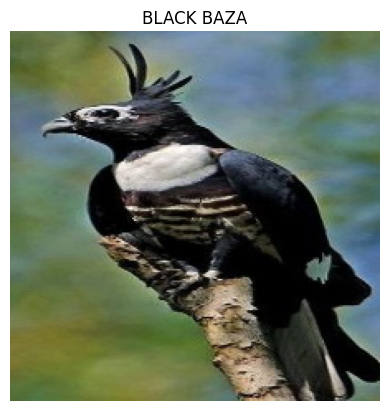

In [9]:
img = view_random_image(train,'BLACK BAZA')

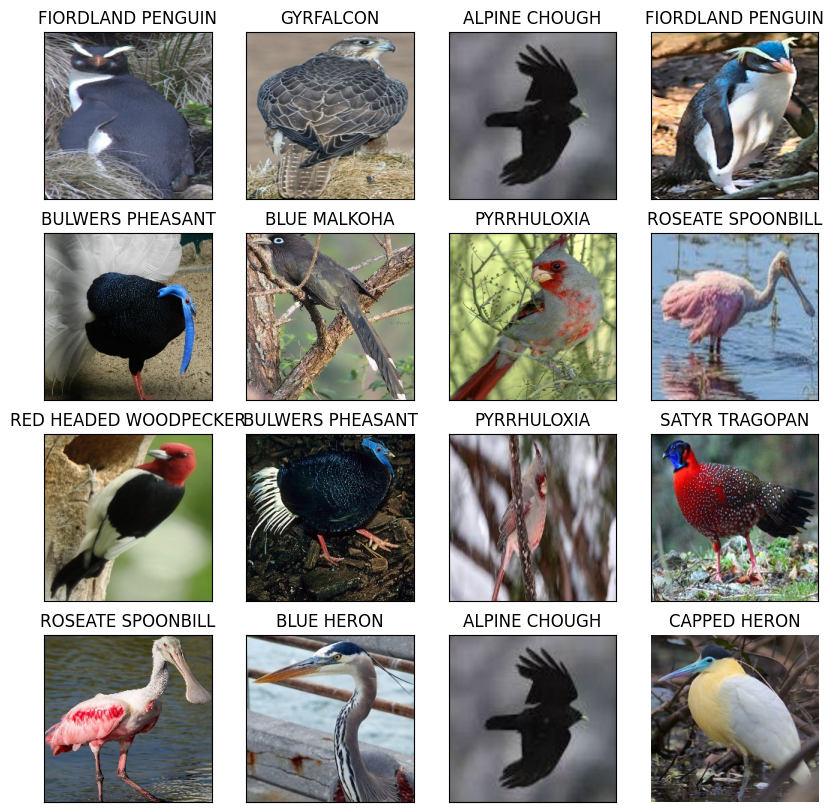

In [10]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

random_index = np.random.randint(0 , len(BirdClasses)-1 , 16)

for i, ax in enumerate(axes.flat):
    ax.imshow(view_random_image(train,BirdClasses[random_index[i]]))
    ax.set_title(BirdClasses[random_index[i]])

In [11]:
train_data = "/content/train/"
test_data = "/content/test/"
val_data = "/content/valid/"

In [12]:
from keras.applications.mobilenet_v2 import MobileNetV2

In [13]:
train_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)
val_gen = ImageDataGenerator(rescale=1./255)

data_train = train_gen.flow_from_directory( train_data , target_size=(224,224) , batch_size=32 , class_mode = "categorical" ,shuffle=True )

data_val = val_gen.flow_from_directory( val_data , target_size=(224,224) , batch_size=32 , class_mode = "categorical" , shuffle=True )

data_test = test_gen.flow_from_directory( test_data , target_size=(224,224) , batch_size=32 , class_mode = "categorical" ,shuffle=False )

Found 4195 images belonging to 25 classes.
Found 125 images belonging to 25 classes.
Found 125 images belonging to 25 classes.


In [14]:
mobilenet = MobileNetV2( include_top=False , weights="imagenet" , input_shape=(224,224,3))

mobilenet.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                

In [ ]:
mobilenet.trainable=True

for layer in mobilenet.layers[:-20]:
  layer.trainable=False
  

In [16]:
Model = Sequential([
    mobilenet,
    GlobalAveragePooling2D(),
    BatchNormalization(),
    Dense(256,activation='relu'),
    BatchNormalization(),
    Dense(25,activation='softmax')
])

Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 batch_normalization (BatchN  (None, 1280)             5120      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 256)               327936    
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                        

In [17]:
Model.compile( optimizer="adam", loss="categorical_crossentropy" , metrics=["accuracy"] )

In [18]:
callbacks = [EarlyStopping(monitor='val_accuracy' , patience=10 , restore_best_weights=True)]

In [19]:
history = Model.fit(data_train,epochs=15 , batch_size=32 ,steps_per_epoch = len(data_train)
,callbacks=callbacks ,workers=10,use_multiprocessing=True, validation_data=data_val,validation_steps = len(data_val))

Epoch 1/15
132/132 [==============================] - 44s 182ms/step - loss: 0.4013 - accuracy: 0.8903 - val_loss: 1.6152 - val_accuracy: 0.6400
Epoch 2/15
132/132 [==============================] - 26s 186ms/step - loss: 0.0652 - accuracy: 0.9814 - val_loss: 2.8911 - val_accuracy: 0.4800
Epoch 3/15
132/132 [==============================] - 26s 186ms/step - loss: 0.0281 - accuracy: 0.9938 - val_loss: 1.2211 - val_accuracy: 0.7040
Epoch 4/15
132/132 [==============================] - 25s 177ms/step - loss: 0.0848 - accuracy: 0.9743 - val_loss: 2.6508 - val_accuracy: 0.6000
Epoch 5/15
132/132 [==============================] - 26s 180ms/step - loss: 0.0564 - accuracy: 0.9845 - val_loss: 1.2607 - val_accuracy: 0.7680
Epoch 6/15
132/132 [==============================] - 24s 174ms/step - loss: 0.0385 - accuracy: 0.9895 - val_loss: 1.7197 - val_accuracy: 0.7280
Epoch 7/15
132/132 [==============================] - 26s 187ms/step - loss: 0.0376 - accuracy: 0.9886 - val_loss: 4.4731 - val_ac

In [38]:
results = Model.evaluate(data_test, verbose=0)


print("Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

Test Loss: 1.04543
Test Accuracy: 84.00%


In [22]:
pred = Model.predict(data_test)
pred = np.argmax(pred,axis=1)

4/4 [==============================] - 3s 89ms/step


True Label: ALPINE CHOUGH
Predicted Label: ALPINE CHOUGH


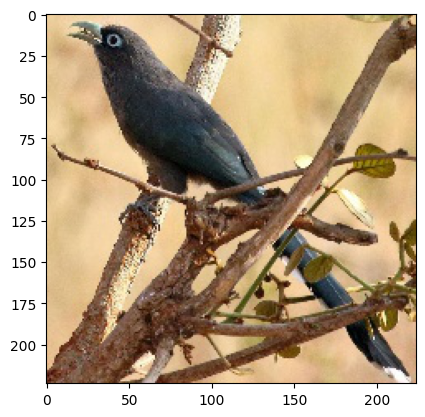

In [41]:
index =1

img , label = data_test[index]
label = data_test.labels[index]
print(f"True Label: {BirdClasses[label]}")
print(f"Predicted Label: {BirdClasses[pred[index]]}")  
plt.imshow(img[0])
plt.show()

1/1 [==============================] - 0s 23ms/step


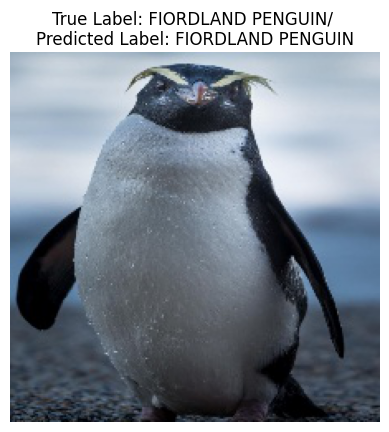

In [42]:
from PIL import Image
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
image_path = "/content/valid/FIORDLAND PENGUIN/1.jpg"
image_width = 224
image_height = 224
img = image.load_img(image_path, target_size=(image_width, image_height))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) 
true_label = 'FIORDLAND PENGUIN/'
img_array = img_array / 255.0 
predictions = Model.predict(img_array)
predicted_label = np.argmax(predictions, axis=1)
plt.imshow(img)
plt.axis("off")
plt.title(f"True Label: {true_label} \nPredicted Label: {BirdClasses[predicted_label[0]]}")
plt.show()


In [33]:
Model.save("BirdSpecies.h5")

In [ ]:
Model.save("BirdSpecies.h5")

In [34]:
def plot_curves(history):

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #plot loss
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("Loss")
  plt.xlabel("epochs")
  plt.legend()

  #plot accuracy
  plt.figure() 
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("epochs")
  plt.legend()
  plt.show()
  plt.tight_layout()

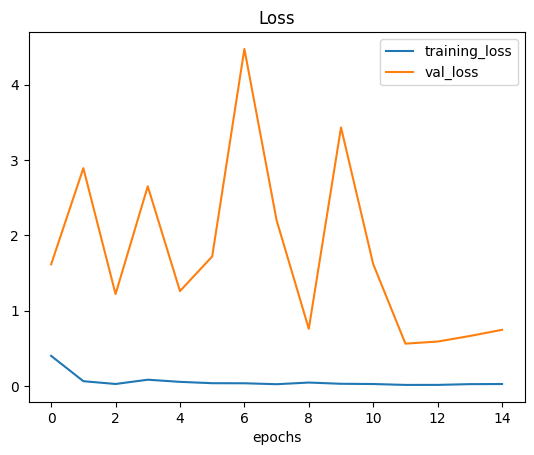

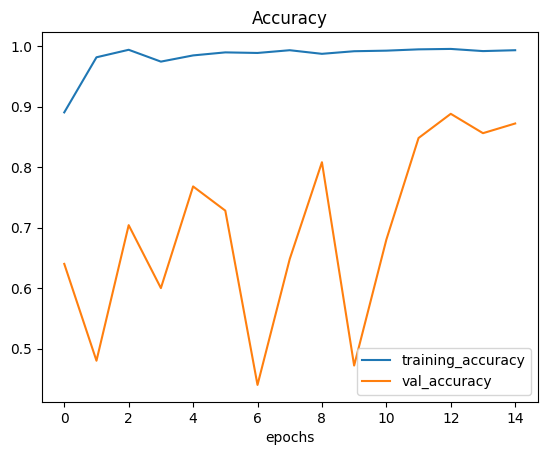

<Figure size 640x480 with 0 Axes>

In [35]:
plot_curves(history)

In [36]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [37]:
import zipfile

def zip_folders(folders, zip_filename):
    with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for folder in folders:
            for root, dirs, files in os.walk(folder):
                for file in files:
                    zipf.write(os.path.join(root, file))

folders_to_zip = ['test', 'train', 'valid']
zip_filename = '/content/drive/MyDrive/zipped_folders.zip'

zip_folders(folders_to_zip, zip_filename)
